In [1]:
# imports and loading data
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

# load file
df = pd.read_excel('/home/sachintha/PycharmProjects/ML-sliit-research/system/main/uploads/SL_2018CrimeDataSet.xlsx', skiprows=1)

In [2]:
# ------------------ Preprocessing Data -------------------------

# missing values fixing
df['Education Level (O/L pass rate)'].fillna(df['Education Level (O/L pass rate)'].mode(), inplace=True)
df.dropna(inplace=True)

# categorical data encoding
label_encoder = preprocessing.LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Crime'] = label_encoder.fit_transform(df['Crime'])
df['Penalty'] = label_encoder.fit_transform(df['Penalty'])

# new dataset with required features
dfn = df.drop(columns=['Year','NumOfCrime','Penalty'])
dfn.columns = ['area','crime','month','day','hour','danger_lvl',
          'temp','popul_den','education_lvl','economy','alcohol_drug_usage']

<Figure size 1152x360 with 0 Axes>

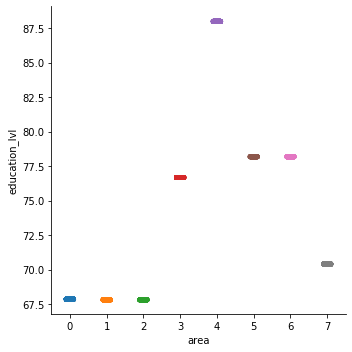

In [3]:
# ------------------ Analysing Data -------------------------

plt.figure(figsize=(16,5))
sns.catplot(x="area", y="education_lvl", data=dfn);
# sns.violinplot(x='Month',y='alcohol and drug usage',data=df, hue='Penalty')
plt.show()

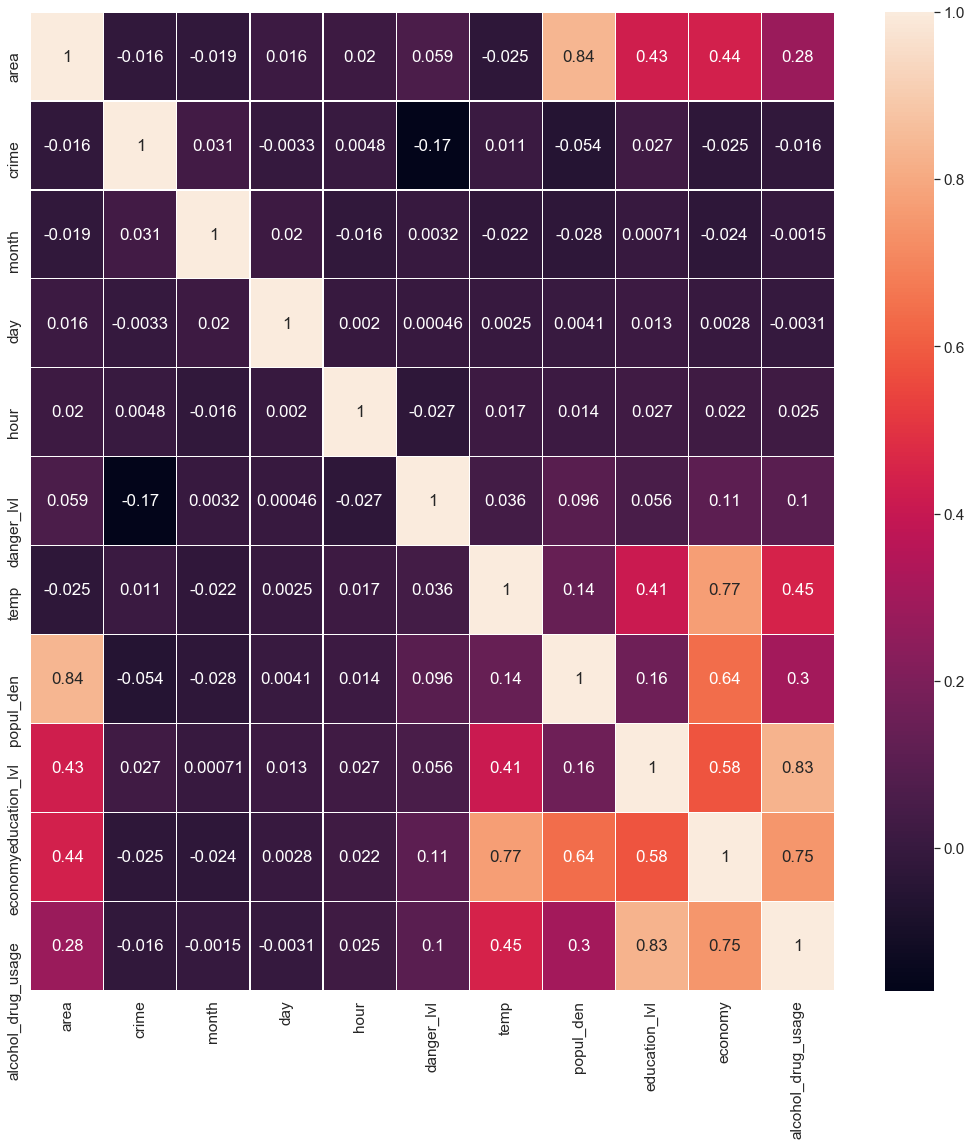

In [4]:
# ------------------ Feature Engineering -------------------------

plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
ax = sns.heatmap(dfn.corr(), annot = True ,linewidths=.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [5]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

columns_to_drop = find_correlation(dfn.drop(columns=['danger_lvl','crime']) , 0.7)
df4 = dfn.drop(columns=columns_to_drop)

In [6]:
df4

,crime,month,day,hour,danger_lvl,popul_den,economy,alcohol_drug_usage
0,0,5.0,12.0,16.0,5.0,129.0,58326.0,2368.0
1,0,5.0,7.0,15.0,5.0,129.0,58326.0,2368.0
2,0,4.0,23.0,16.0,5.0,129.0,58326.0,2368.0
3,0,4.0,20.0,11.0,5.0,129.0,58326.0,2368.0
4,0,4.0,12.0,17.0,5.0,129.0,58326.0,2368.0
...,...,...,...,...,...,...,...,...
11080,7,7.0,2.0,16.0,5.0,4143.0,69171.0,4338.0
11081,7,5.0,25.0,8.0,5.0,4143.0,69171.0,4338.0
11082,14,8.0,2.0,10.0,1.0,4143.0,69171.0,4338.0
11083,14,10.0,10.0,17.0,1.0,4143.0,69171.0,4338.0


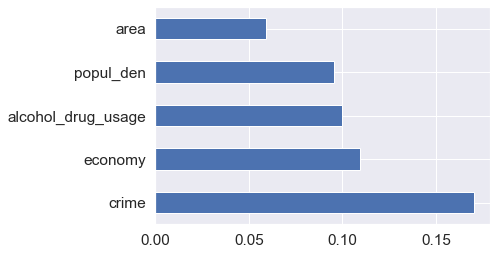

In [7]:
corr = dfn.corr()
linear_features=abs(corr).danger_lvl.drop('danger_lvl').sort_values(ascending=False)[:5].keys()
abs(corr).danger_lvl.drop('danger_lvl').sort_values(ascending=False)[:5].plot(kind='barh')

In [8]:
linear_features

Index(['crime', 'economy', 'alcohol_drug_usage', 'popul_den', 'area'], dtype='object')

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = dfn.copy(deep=True)['danger_lvl']
model = rf.fit(dfn.drop(['danger_lvl', 'crime'], axis=1),y)

/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


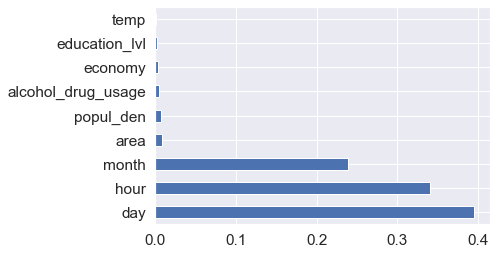

In [10]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=dfn.drop(['danger_lvl','crime'], axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

In [11]:
# Convert Categorical Variables into Dummy Variables
dfn['area'] = dfn['area'].astype('object')
dfn['crime'] = dfn['crime'].astype('object')
dfn['month'] = dfn['month'].astype('object')
dfn['day'] = dfn['day'].astype('object')
dfn['hour'] = dfn['hour'].astype('object')
# dfn['danger_lvl'] = dfn['danger_lvl'].astype('object')
dfn.dtypes

area                   object
crime                  object
month                  object
day                    object
hour                   object
danger_lvl            float64
temp                  float64
popul_den             float64
education_lvl         float64
economy               float64
alcohol_drug_usage    float64
dtype: object

In [12]:
dfn

,area,crime,month,day,hour,danger_lvl,temp,popul_den,education_lvl,economy,alcohol_drug_usage
0,0,0,5,12,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
1,0,0,5,7,15,5.0,28.0,129.0,67.860268,58326.0,2368.0
2,0,0,4,23,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
3,0,0,4,20,11,5.0,28.0,129.0,67.860268,58326.0,2368.0
4,0,0,4,12,17,5.0,28.0,129.0,67.860268,58326.0,2368.0
...,...,...,...,...,...,...,...,...,...,...,...
11080,7,7,7,2,16,5.0,27.0,4143.0,70.404351,69171.0,4338.0
11081,7,7,5,25,8,5.0,27.0,4143.0,70.404351,69171.0,4338.0
11082,7,14,8,2,10,1.0,27.0,4143.0,70.404351,69171.0,4338.0
11083,7,14,10,10,17,1.0,27.0,4143.0,70.404351,69171.0,4338.0


In [13]:
dfn.head(10)

,area,crime,month,day,hour,danger_lvl,temp,popul_den,education_lvl,economy,alcohol_drug_usage
0,0,0,5,12,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
1,0,0,5,7,15,5.0,28.0,129.0,67.860268,58326.0,2368.0
2,0,0,4,23,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
3,0,0,4,20,11,5.0,28.0,129.0,67.860268,58326.0,2368.0
4,0,0,4,12,17,5.0,28.0,129.0,67.860268,58326.0,2368.0
5,0,0,3,26,20,5.0,28.0,129.0,67.860268,58326.0,2368.0
6,0,0,3,10,12,5.0,28.0,129.0,67.860268,58326.0,2368.0
7,0,0,6,28,4,5.0,28.0,129.0,67.860268,58326.0,2368.0
8,0,0,2,16,9,5.0,28.0,129.0,67.860268,58326.0,2368.0
9,0,0,7,9,18,5.0,28.0,129.0,67.860268,58326.0,2368.0


In [14]:
df_1 = pd.get_dummies(dfn, drop_first=True)
df_1.head()

,danger_lvl,temp,popul_den,education_lvl,economy,alcohol_drug_usage,area_1,area_2,area_3,area_4,...,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0
0,5.0,28.0,129.0,67.860268,58326.0,2368.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,28.0,129.0,67.860268,58326.0,2368.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5.0,28.0,129.0,67.860268,58326.0,2368.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5.0,28.0,129.0,67.860268,58326.0,2368.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,28.0,129.0,67.860268,58326.0,2368.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
dfn

,area,crime,month,day,hour,danger_lvl,temp,popul_den,education_lvl,economy,alcohol_drug_usage
0,0,0,5,12,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
1,0,0,5,7,15,5.0,28.0,129.0,67.860268,58326.0,2368.0
2,0,0,4,23,16,5.0,28.0,129.0,67.860268,58326.0,2368.0
3,0,0,4,20,11,5.0,28.0,129.0,67.860268,58326.0,2368.0
4,0,0,4,12,17,5.0,28.0,129.0,67.860268,58326.0,2368.0
...,...,...,...,...,...,...,...,...,...,...,...
11080,7,7,7,2,16,5.0,27.0,4143.0,70.404351,69171.0,4338.0
11081,7,7,5,25,8,5.0,27.0,4143.0,70.404351,69171.0,4338.0
11082,7,14,8,2,10,1.0,27.0,4143.0,70.404351,69171.0,4338.0
11083,7,14,10,10,17,1.0,27.0,4143.0,70.404351,69171.0,4338.0


In [16]:
# Split Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfn.drop(['danger_lvl','crime'],1), dfn['danger_lvl'], test_size = .2, random_state=10)

In [17]:
y_train.head()

1586     3.0
5569     2.0
2295     1.0
10395    1.0
1864     1.0
Name: danger_lvl, dtype: float64

In [18]:
# Random Forest Classifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.3044953350296862


/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


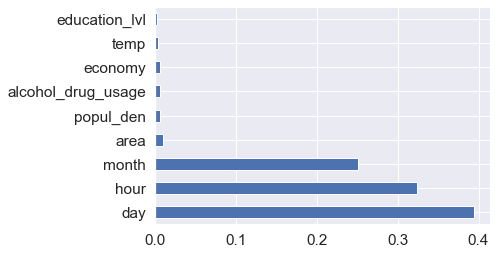

In [19]:
importance = model.feature_importances_
feat_importances_act = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

In [20]:
# Other Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()],
       ['Multi-layer Perceptron (NN) :',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression : 0.3519932145886344
Decision Tree Classification : 0.2866836301950806
Gradient Boosting Classification : 0.3477523324851569
Ada Boosting Classification : 0.37150127226463103
Extra Tree Classification : 0.31212892281594573


/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


K-Neighbors Classification : 0.3189143341815098


/home/sachintha/anaconda3/envs/ML-sliit-research/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classification : 0.35453774385072095
Gaussian Naive Bayes : 0.3265479219677693
Multi-layer Perceptron (NN) : 0.35284139100932993


In [21]:
# Hyper Parameter Tuning
random.seed(100)
rfmodel = RandomForestClassifier()

#Hyperparameter tuning for Logistic Regression
random.seed(100)
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 20, 50, 100]
max_depth = [5,10,15,20]
hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(rfmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_rfmodel.fit(dfn.drop(['danger_lvl','crime'], 1), dfn['danger_lvl'])
print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Best Estimators: 10
Best Max Depth: 10


In [22]:
random.seed(100)
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=10)
rfmodel.fit(X_train, y_train)
predictions = rfmodel.predict(X_test)
print(accuracy_score(y_test,predictions))

0.3418150975402884


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[252 120   9   1  34]
 [183 119   8   0  27]
 [ 89  47   5   0  19]
 [ 51  25   2   0   3]
 [112  38   8   0  27]]
              precision    recall  f1-score   support

         1.0       0.37      0.61      0.46       416
         2.0       0.34      0.35      0.35       337
         3.0       0.16      0.03      0.05       160
         4.0       0.00      0.00      0.00        81
         5.0       0.25      0.15      0.18       185

    accuracy                           0.34      1179
   macro avg       0.22      0.23      0.21      1179
weighted avg       0.29      0.34      0.30      1179

0.3418150975402884


In [24]:
# Model Evaluation
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,predictions)

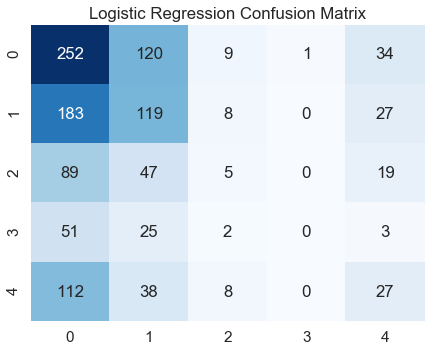

In [25]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
ax = sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()